## 	European part of the Collaborative Seismic Earth Model(version 2019.12.01)
Details of the dataset:
- Name: 	CSEM_Europe
- Title: 	European part of the Collaborative Seismic Earth Model(version 2019.12.01)
- Type:	3-D Tomography Earth Model
- Sub Type: 	SH velocity, SV velocity
- Year	2019

Author(s):	
- Andreas Fichtner
  - ETH Zurich
  - Zurich, Switzerland
- Florian Rickers
  - Utrecht University
  - Utrecht, The Netherlands
- Yesim Cubuk-Sabuncu
  - Icelandic Meteorological Service
  - Reykjavik, Iceland
- Nienke Blom
  - University of Cambridge
  - Cambridge, UK
- Alexey Gokhberg
  - ETH Zurich
  - Department of Earth Sciences
  - Zurich, Switzerland

Reference(s):	
- Blom, N. and Gokhberg, A. and Fichtner, A., 202. Seismic waveform tomography of the central and eastern Mediterranean upper mantle. Andreas.Solid Earth; Gottingen Vol. 11, Iss. 2, (2020): 669-690. doi:10.5194/se-11-669-2020
- Cubuk-Sabuncu, Y., Taymaz, T., Fichtner, A., 2017. 3-D crustal velocity structure of western Turkey: constraints from full-waveform tomography, Physics of the Earth and Planetary Interiors 270, 90-112.
- Fichtner, A., Trampert, J., Cupillard, P., Saygin, E., Taymaz, T., Capdeville, Y., Villasenor, A., 2013. Multi-scale full waveform inversion. Geophysical Journal International 194, 534-556.
- Fichtner, A., Bunge, H.-P., Igel, H., 2006. The adjoint method in seismology - I. Theory. Physics of the Earth and Planetary Interiors 157, 86-104.
- Fichtner, A., Trampert, J., Cupillard, P., Saygin, E., Taymaz, T., Capdeville, Y., Villasenor, A., 2013. Multi-scale full waveform inversion. Geophysical Journal International 194, 534-556.
- Fichtner, A., van Herwaarden, D.-P., Afanasiev, M., Simute, S., Krischer, L., Cubuk-Sabuncu, Y., Taymaz, T., Colli, L., Saygin, E., Villasenor, A., Trampert, J., Cupillard, P., Bunge, H.-P., Igel, H., 2018. The Collaborative Seismic Earth Model: Generation I. Geophysical Research Letters 45, doi:10.1029/2018GL077338.

DOI:	doi:10.17611/DP/18027090

Depth Coverage:	0.0 - 600.0 km

Areal Coverage:	Latitude: 30.0 to 75.2 Longitude: -35.0 to 85.0

Model Description:
- CSEM_Europe (V. 2019.12.01) is the European part of the Collaborative Seismic Earth Model (CSEM, Fichtner et al., 2018). It has been constructed using multi-scale full seismic waveform inversion, combining spectral-element waveform modelling and adjoint techniques, as described in Fichtner et al. (2006,2009). This submodel has been extracted from the variable-parameterisation CSEM onto a regular grid, readable by EMC tools. While having regional contributions from various sub-inversions, the structure in this model is dominated by the full-waveforms inversion described in Fichtner et al. (2013), Rickers et al. (2013), Cubuk-Sabuncu et al. (2017), and Blom et al. (2020).

Data Set Description
- Since the datasets included in the CSEM are too heterogeneous for a brief description, please see Fichtner et al. (2018) for details.

Web Page
- [cos.ethz.ch/research/CSEM.html](https://ds.iris.edu/spud/earthmodel/18027090)

EMC Page
- [ds.iris.edu/ds/products/emc-csem_europe/](https://ds.iris.edu/spud/earthmodel/18027090)


## Step0: Downloading & Loading the Source Datasets

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

data_path = "../../../OpenSWI/Datasets/Original/OpenSWI-deep/csem-europe-2019.12.01.nc"

# load the .nc file
data = xr.open_dataset(data_path)

# print the keys of the dataset
print(data.keys())

KeysView(<xarray.Dataset>
Dimensions:    (latitude: 91, longitude: 241, depth: 61)
Coordinates:
  * latitude   (latitude) float32 30.0 30.5 31.0 31.5 ... 73.5 74.0 74.5 75.0
  * longitude  (longitude) float32 -35.0 -34.5 -34.0 -33.5 ... 84.0 84.5 85.0
  * depth      (depth) float32 0.0 10.0 20.0 30.0 ... 570.0 580.0 590.0 600.0
Data variables:
    vsv        (depth, latitude, longitude) float32 ...
    vsh        (depth, latitude, longitude) float32 ...
Attributes: (12/31)
    title:                         Collaborative Seismic Earth Model (CSEM) -...
    id:                            csem_europe
    summary:                       CSEM extraction of Europe
    keywords:                      Collaborative Seismic Earth Model, multi-s...
    Conventions:                   CF-1.0
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    ...                            ...
    author_email:                  andreas.fichtner@erdw.ethz.ch
    author_institution:            ETH Z

## Step 1: Velocity Profile Extracting
1. Extracting
2. De-duplicating

In [2]:
latitude = np.array(data['latitude'].values)
longitude = np.array(data['longitude'].values)
depth = np.array(data['depth'].values)
vsv = np.array(data['vsv'].values)
vsh = np.array(data['vsh'].values)

LON,LAT = np.meshgrid(longitude,latitude)


# print the shape of the dataset
print(latitude.shape,longitude.shape,depth.shape,vsv.shape,vsh.shape)


(91,) (241,) (61,) (61, 91, 241) (61, 91, 241)


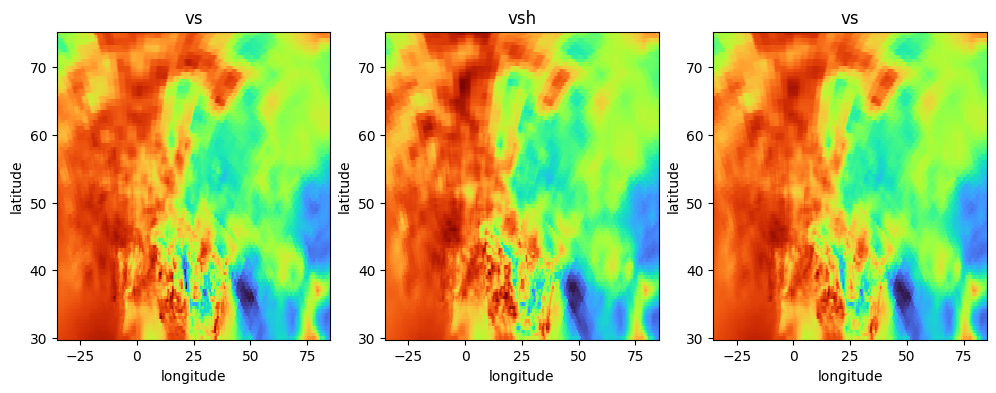

In [3]:
# average the vsv and vsh
vs = np.sqrt(vsv*vsh)

# plot the vs
fig,axs = plt.subplots(1,3,figsize=(12,4))
axs[0].pcolormesh(LON,LAT,vsv[4,:,:],cmap='turbo')
axs[0].set_title('vs')
axs[0].set_xlabel('longitude')
axs[0].set_ylabel('latitude')
axs[1].pcolormesh(LON,LAT,vsh[4,:,:],cmap='turbo')
axs[1].set_title('vsh')
axs[1].set_xlabel('longitude')
axs[1].set_ylabel('latitude')
axs[2].pcolormesh(LON,LAT,vs[4,:,:],cmap='turbo')
axs[2].set_title('vs')
axs[2].set_xlabel('longitude')
axs[2].set_ylabel('latitude')
plt.show()

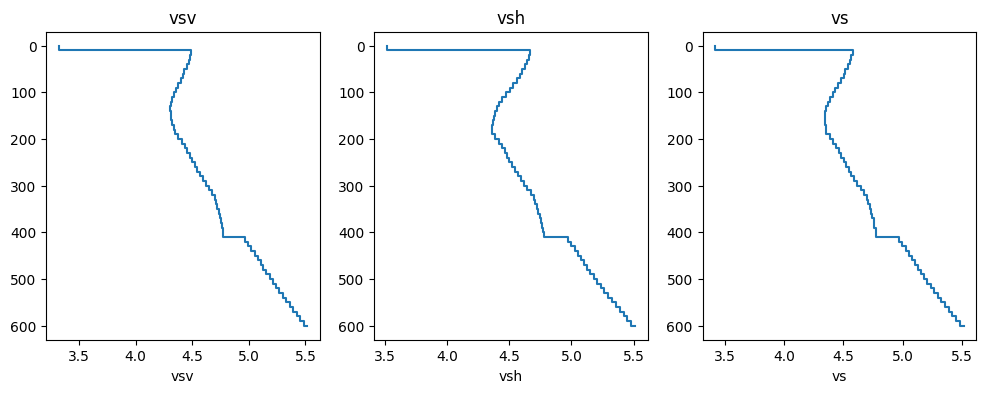

In [4]:
# single station comparsion
fig,axs = plt.subplots(1,3,figsize=(12,4))
axs[0].step(vsv[:,0,0],depth)
axs[0].set_title('vsv')
axs[0].set_xlabel('vsv')
axs[0].invert_yaxis()
axs[1].step(vsh[:,0,0],depth)
axs[1].set_title('vsh')
axs[1].set_xlabel('vsh')
axs[1].invert_yaxis()
axs[2].step(vs[:,0,0],depth)
axs[2].set_title('vs')
axs[2].set_xlabel('vs')
axs[2].invert_yaxis()
plt.show()

## Step 2: Quality Control & Interpolation

In [ ]:
import sys
sys.path.append('../../../')
from SWIDP.process_1d_deep import *
from SWIDP.dispersion import *

In [6]:
vs.shape

(61, 91, 241)

In [7]:
vs = vs.reshape(vs.shape[0],-1).T
vs.shape

(21931, 61)

In [8]:
# -------------------------------------------------------
#  interp to 1 km thickness
# -------------------------------------------------------

from scipy.interpolate import interp1d
max_depth = 300+0.1
depth_interp = np.concatenate([
    np.arange(0, max_depth, 1)
])
vs_models = vs_interp = np.zeros((vs.shape[0],depth_interp.shape[0]))
for i in range(vs.shape[0]):
    vs_temp = vs[i,:]
    depth_interp_temp = depth_interp[:np.argmin(np.abs(depth_interp-depth.max()))]
    f = interp1d(depth.reshape(-1),vs_temp,kind='nearest')
    vs_temp = f(depth_interp_temp)
    vs_interp[i,:len(vs_temp)] = vs_temp
vs_interp[:,len(vs_temp):] = vs_interp[:,len(vs_temp)-1].reshape(-1,1)
vs_interp.shape

(21931, 301)

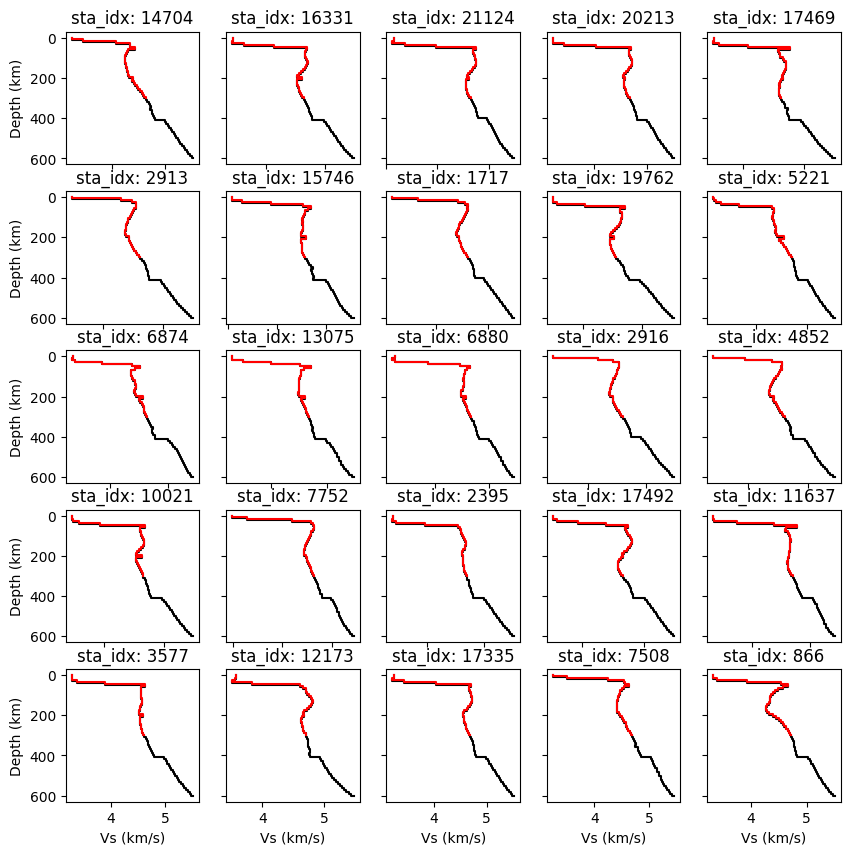

In [9]:
nrows = 5
ncols = 5
fig,axs = plt.subplots(nrows,ncols,figsize=(10,10))
for i in range(nrows):
    for j in range(ncols):
        sta_idx = np.random.randint(0,len(vs))
        axs[i,j].step(vs[sta_idx,:],depth,c='k')
        axs[i,j].step(vs_interp[sta_idx,:],depth_interp,c='r')
        axs[i,j].invert_yaxis()
        axs[i,j].set_title(f'sta_idx: {sta_idx}')
        if j == 0:
            axs[i,j].set_ylabel('Depth (km)')
        else:
            axs[i,j].tick_params(labelleft=False)
        if i == nrows-1:
            axs[i,j].set_xlabel('Vs (km/s)')
        else:
            axs[i,j].tick_params(labelbottom=False)
plt.show()

In [10]:
# -------------------------------------------------------
#  remove the sandwich layers
# -------------------------------------------------------
from p_tqdm import p_map
# process all the stations
vs_interp_rm_sandwich = p_map(combine_thin_sandwich,
                            vs_interp,
                            list(depth_interp.reshape(1,-1))*len(vs_interp),
                            [12]*len(vs_interp),
                            [1]*len(vs_interp),
                            [0.05]*len(vs_interp),
                            [False]*len(vs_interp))

# find the moho depth
vs_interp_rm_sandwich = np.array(vs_interp_rm_sandwich)
vs_interp_rm_sandwich.shape


  0%|          | 0/21931 [00:00<?, ?it/s]

(21931, 301)

In [11]:
# -------------------------------------------------------
#  Smooth velocity model (B spline)
# -------------------------------------------------------
from p_tqdm import p_map
# process all the stations
vs_interp_rm_sandwich = p_map(smooth_vs_by_node_interp,
                            vs_interp_rm_sandwich,
                            list(depth_interp.reshape(1,-1))*len(vs_interp_rm_sandwich),
                            [20]*len(vs_interp_rm_sandwich),
                            ["pchip"]*len(vs_interp_rm_sandwich))

# find the moho depth
vs_interp_rm_sandwich = np.array(vs_interp_rm_sandwich)
vs_interp_rm_sandwich.shape


  0%|          | 0/21931 [00:00<?, ?it/s]

(21931, 301)

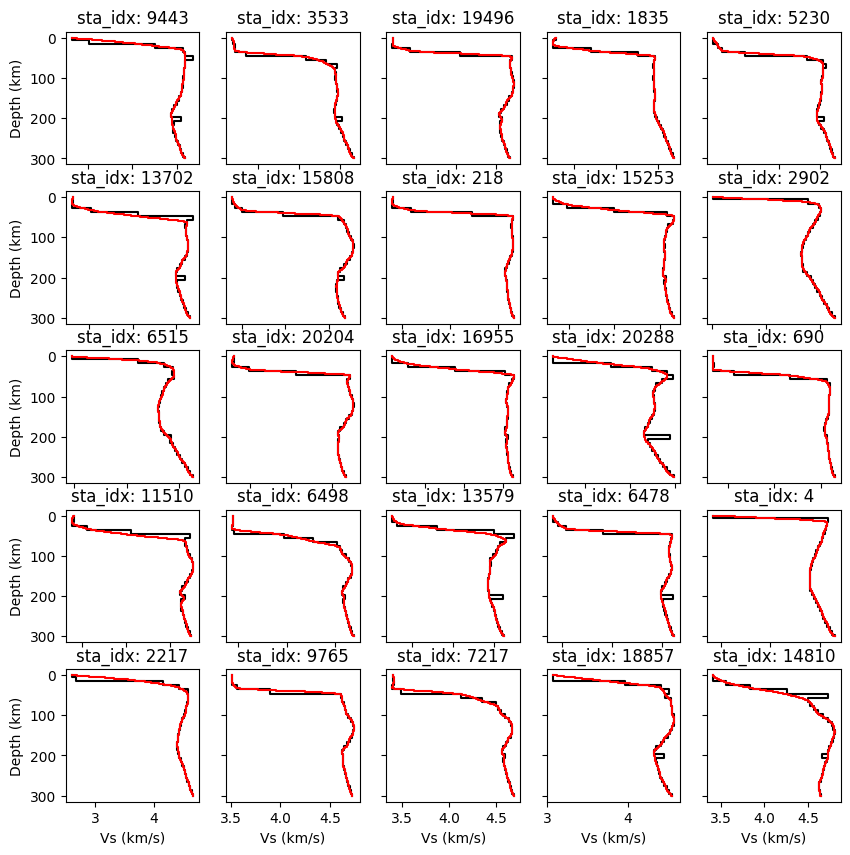

In [12]:
nrows = 5
ncols = 5
fig,axs = plt.subplots(nrows,ncols,figsize=(10,10))
for i in range(nrows):
    for j in range(ncols):
        sta_idx = np.random.randint(0,len(vs))
        axs[i,j].step(vs_interp[sta_idx,:],depth_interp,c='k')
        axs[i,j].step(vs_interp_rm_sandwich[sta_idx,:],depth_interp,c='r')
        axs[i,j].invert_yaxis()
        axs[i,j].set_title(f'sta_idx: {sta_idx}')
        if j == 0:
            axs[i,j].set_ylabel('Depth (km)')
        else:
            axs[i,j].tick_params(labelleft=False)
        if i == nrows-1:
            axs[i,j].set_xlabel('Vs (km/s)')
        else:
            axs[i,j].tick_params(labelbottom=False)
plt.show()

## Step 3: Find the Moho 

In [13]:
moho_idxs = p_map(find_moho_depth,
                  vs_interp_rm_sandwich,
                  list(depth_interp.reshape(1,-1))*len(vs_interp_rm_sandwich),
                  [[5,90]]*len(vs_interp_rm_sandwich),
                  [False]*len(vs_interp_rm_sandwich),
                  [0.1]*len(vs_interp_rm_sandwich),
                  [10]*len(vs_interp_rm_sandwich))
moho_idxs = np.array(moho_idxs)
moho_idxs.shape

  0%|          | 0/21931 [00:00<?, ?it/s]

(21931,)

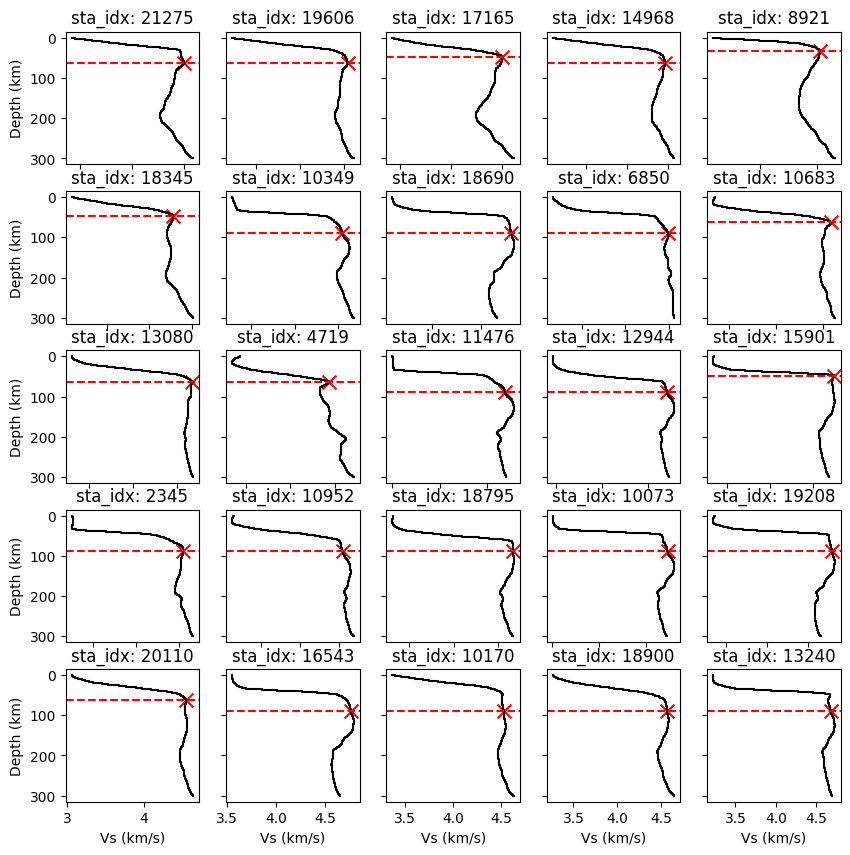

In [14]:
nrows = 5
ncols = 5
fig,axs = plt.subplots(nrows,ncols,figsize=(10,10))
for i in range(nrows):
    for j in range(ncols):
        sta_idx = np.random.randint(0,len(vs))
        moho_depth_idx = moho_idxs[sta_idx]
        axs[i,j].step(vs_interp_rm_sandwich[sta_idx,:],depth_interp,c='k')
        axs[i,j].axhline(y = depth_interp[moho_depth_idx],color='r',linestyle='--')
        axs[i,j].scatter(vs_interp_rm_sandwich[sta_idx,moho_depth_idx],depth_interp[moho_depth_idx],c='r',marker='x',s=100)
        axs[i,j].invert_yaxis()
        axs[i,j].set_title(f'sta_idx: {sta_idx}')
        if j == 0:
            axs[i,j].set_ylabel('Depth (km)')
        else:
            axs[i,j].tick_params(labelleft=False)
        if i == nrows-1:
            axs[i,j].set_xlabel('Vs (km/s)')
        else:
            axs[i,j].tick_params(labelbottom=False)
plt.show()

## Step 4: Perturbation the Moho depth and velocity

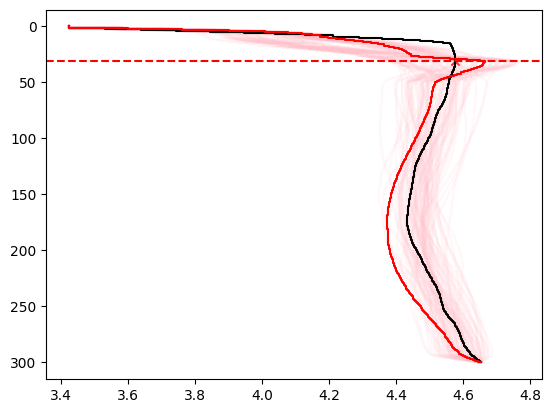

(100, 301)

In [15]:
# Generate perturbed models single
i = 10
vs_orig = vs_interp_rm_sandwich[i]
# Find Moho
moho_idx = moho_idxs[i]
plt.figure()
plt.step(vs_orig,depth_interp,c='k')
plt.scatter(vs_orig[moho_idx],depth_interp[moho_idx],c='r',marker='x')
plt.axhline(y=depth_interp[moho_idx],color='r',linestyle='--')

vs_perts = []
perturb_num = 100
random_seeds = np.random.randint(0,1000000,perturb_num)
for i in range(perturb_num):
    # Generate perturbed profile
    vs_pert, controle_node_t, controle_node_vs = augment_crust_moho_mantle(vs_orig, 
                                                                depth_interp, 
                                                                moho_idx, 
                                                                vs_perturb_range=[-0.2,0.2],
                                                                crust_nodes_range=[3,8],
                                                                mantle_nodes_range=[8,12],
                                                                moho_shift_range=5,
                                                                gaussian_smooth_sigma=2,
                                                                return_nodes=True,
                                                                random_seed=random_seeds[i])
    # plot the perturbed profile
    plt.step(vs_pert,depth_interp,c='pink' if i !=0 else 'r',alpha=0.1 if i !=0 else 1, zorder=1 if i !=0 else 2)
    # plt.scatter(controle_node_vs,controle_node_t,c='b',alpha=0.2)
    vs_perts.append(vs_pert)
vs_perts = np.array(vs_perts)
plt.gca().invert_yaxis()
plt.show()
np.unique(vs_perts,axis=0).shape

In [16]:
vs_interp_rm_sandwich.shape,moho_idxs.shape

((21931, 301), (21931,))

In [17]:
perturb_num = 5
aug_vs_list = [vs_interp_rm_sandwich]
for i in range(perturb_num):
    # perturb the moho depth and velocity 1 time
    random_seeds = np.random.randint(0,1000000,len(vs_interp_rm_sandwich))
    aug_vs_list_temp = p_map(augment_crust_moho_mantle,
                                vs_interp_rm_sandwich,
                                list(depth_interp.reshape(1,-1))*len(vs_interp_rm_sandwich),
                                moho_idxs,
                                [[-0.2,0.2]]*len(vs_interp_rm_sandwich),
                                [[3,8]]*len(vs_interp_rm_sandwich),
                                [[8,12]]*len(vs_interp_rm_sandwich),
                                [5]*len(vs_interp_rm_sandwich),
                                [2]*len(vs_interp_rm_sandwich),
                                [False]*len(vs_interp_rm_sandwich),
                                random_seeds)
    aug_vs_list.append(aug_vs_list_temp)
aug_vs_list = np.array(aug_vs_list)
aug_vs_list.shape

  0%|          | 0/21931 [00:00<?, ?it/s]

  0%|          | 0/21931 [00:00<?, ?it/s]

  0%|          | 0/21931 [00:00<?, ?it/s]

  0%|          | 0/21931 [00:00<?, ?it/s]

  0%|          | 0/21931 [00:00<?, ?it/s]

(6, 21931, 301)

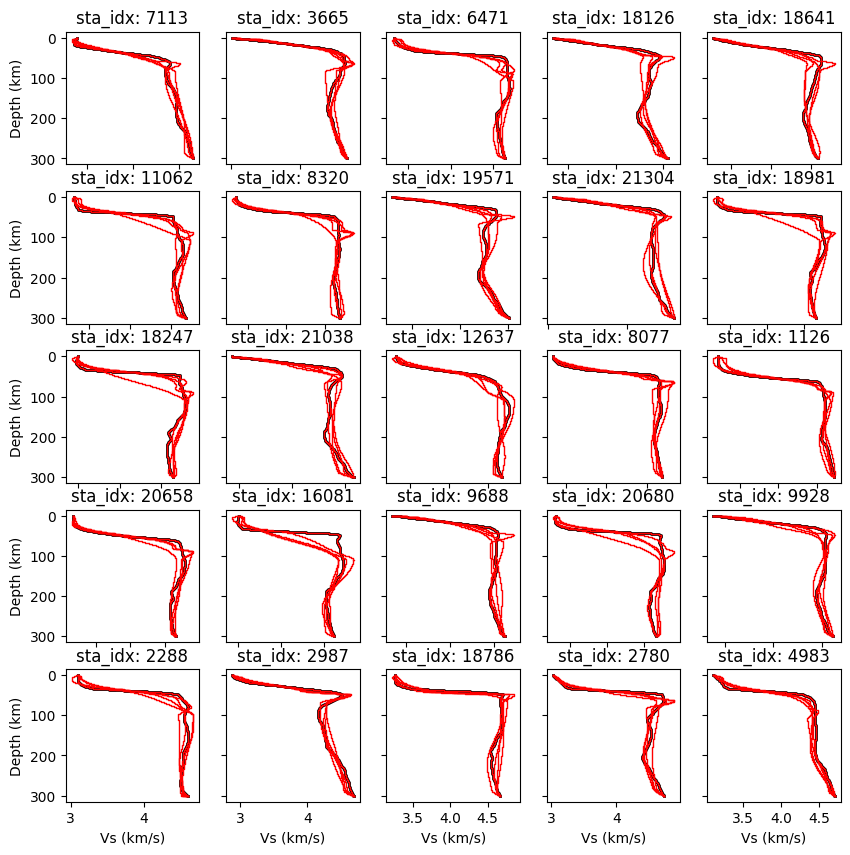

In [18]:
nrows = 5
ncols = 5
fig,axs = plt.subplots(nrows,ncols,figsize=(10,10))
for i in range(nrows):
    for j in range(ncols):
        sta_idx = np.random.randint(0,len(vs_interp_rm_sandwich))
        axs[i,j].step(vs_interp_rm_sandwich[sta_idx,:],depth_interp,c='k',label='original', linewidth=2)

        for k in range(perturb_num):
            axs[i,j].step(aug_vs_list[k,sta_idx,:],depth_interp,c='r',label='perturbed' if k == 0 else None, linewidth=1)

        axs[i,j].invert_yaxis()
        axs[i,j].set_title(f'sta_idx: {sta_idx}')
        if j == 0:
            axs[i,j].set_ylabel('Depth (km)')
        else:
            axs[i,j].tick_params(labelleft=False)
        if i == nrows-1:
            axs[i,j].set_xlabel('Vs (km/s)')
        else:
            axs[i,j].tick_params(labelbottom=False)
plt.show()

## Step 5: Dispersion Curve Inversion

In [19]:
vs_models = aug_vs_list.reshape(-1,aug_vs_list.shape[-1]) # [n_models,n_depth]
depth_models = list(depth_interp.reshape(1,-1))*len(vs_models)
vel_models = p_map(transform_vs_to_vel_model,vs_models,depth_models)
vel_models = np.array(vel_models)
vel_models.shape

  0%|          | 0/131586 [00:00<?, ?it/s]

(131586, 301, 4)

In [20]:
# Calculate dispersion curves
t = generate_mixed_samples(num_samples=300,start=1,end=100,uniform_num=100,log_num=100,random_num=100)
t = np.ones((len(vel_models),len(t)))*t
disp_data = p_map(calculate_dispersion, vel_models, list(t))
disp_data = np.array(disp_data)
vel_models = np.array(vel_models)
vel_models.shape,disp_data.shape

  0%|          | 0/131586 [00:00<?, ?it/s]

((131586, 301, 4), (131586, 300, 3))

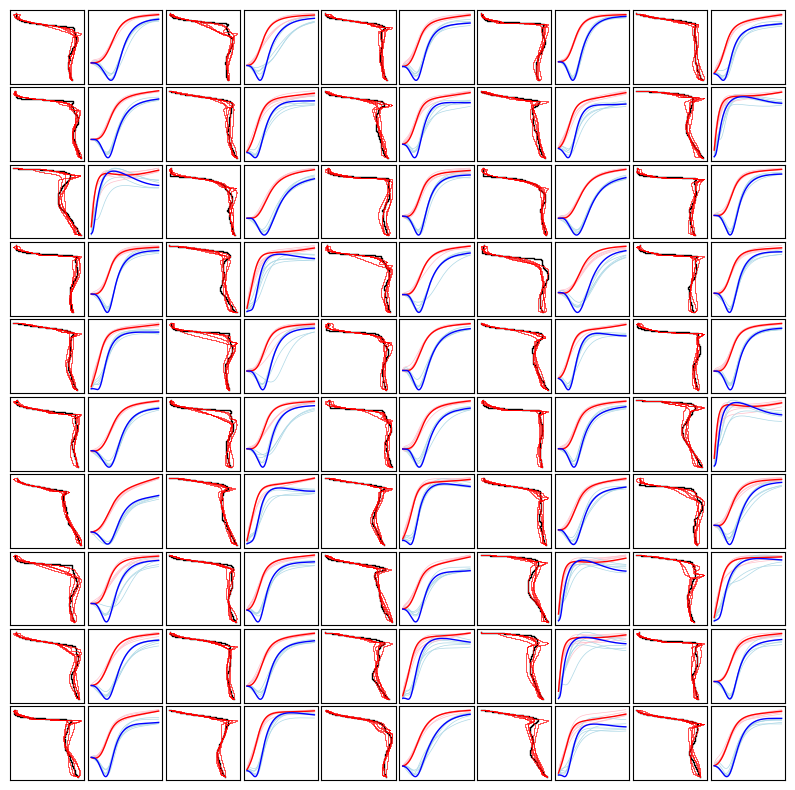

In [21]:
nrows = 10
ncols = 10
fig,axs = plt.subplots(nrows,ncols,figsize=(10,10))

for i in range(nrows):
    for j in range(ncols//2):

        sta_idx = np.random.randint(0,vs_interp_rm_sandwich.shape[0])
        
        # velocity profile
        for k in range(perturb_num+1):
            axs[i,j*2].step(vel_models[k*vs_interp_rm_sandwich.shape[0]+sta_idx][:,2],
                            vel_models[k*vs_interp_rm_sandwich.shape[0]+sta_idx][:,0],
                            linewidth=1 if k == 0 else 0.5,color='k' if k == 0 else 'r')
        axs[i,j*2].set_xticks([])
        axs[i,j*2].set_yticks([])
        axs[i,j*2].invert_yaxis()

        # dispersion curve
        for k in range(perturb_num+1):
            axs[i,j*2+1].plot(disp_data[k*vs_interp_rm_sandwich.shape[0]+sta_idx][:,0],
                                 disp_data[k*vs_interp_rm_sandwich.shape[0]+sta_idx][:,1],
                                 linewidth=1 if k==0 else 0.5,c='r' if k==0 else "pink", zorder=2 if k==0 else 1)
            axs[i,j*2+1].plot(disp_data[k*vs_interp_rm_sandwich.shape[0]+sta_idx][:,0],
                                 disp_data[k*vs_interp_rm_sandwich.shape[0]+sta_idx][:,2],
                                 linewidth=1 if k==0 else 0.5,c='b' if k==0 else "lightblue", zorder=2 if k==0 else 1)
        axs[i,j*2+1].set_xticks([])
        axs[i,j*2+1].set_yticks([])
plt.subplots_adjust(wspace=0.05,hspace=0.05)
plt.show()

In [22]:
phase_mask = np.sum(disp_data[:,:,1] == 0,axis=1)==0
group_mask = np.sum(disp_data[:,:,2] == 0,axis=1)==0
mask = phase_mask*group_mask


# loc = np.hstack((LON.reshape(-1,1),LAT.reshape(-1,1)))[mask,:]
vel_models = vel_models[mask,:,:]
disp_data = disp_data[mask,:,:]

vel_models.shape,disp_data.shape

((131586, 301, 4), (131586, 300, 3))

In [ ]:
import os
save_base_path = "../../../OpenSWI/Datasets/OpenSWI-deep/1s-100s-Aug"
# Save processed data as compressed npz files
# np.savez_compressed(os.path.join(save_base_path, "CSEM_Europe_loc.npz"),
#                     data=loc.astype(np.float32))
np.savez_compressed(os.path.join(save_base_path, "CSEM_Europe_model.npz"),
                    data=vel_models.astype(np.float32))
np.savez_compressed(os.path.join(save_base_path, "CSEM_Europe_disp.npz"),
                    data=disp_data.astype(np.float32))